# Document Layout Analysis

Natural PDF can automatically detect the structure of a document (titles, paragraphs, tables, figures) using layout analysis models. This guide shows how to use this feature.

## Setup

We'll use a sample PDF that includes various layout elements.

CropBox missing from /Page, defaulting to MediaBox


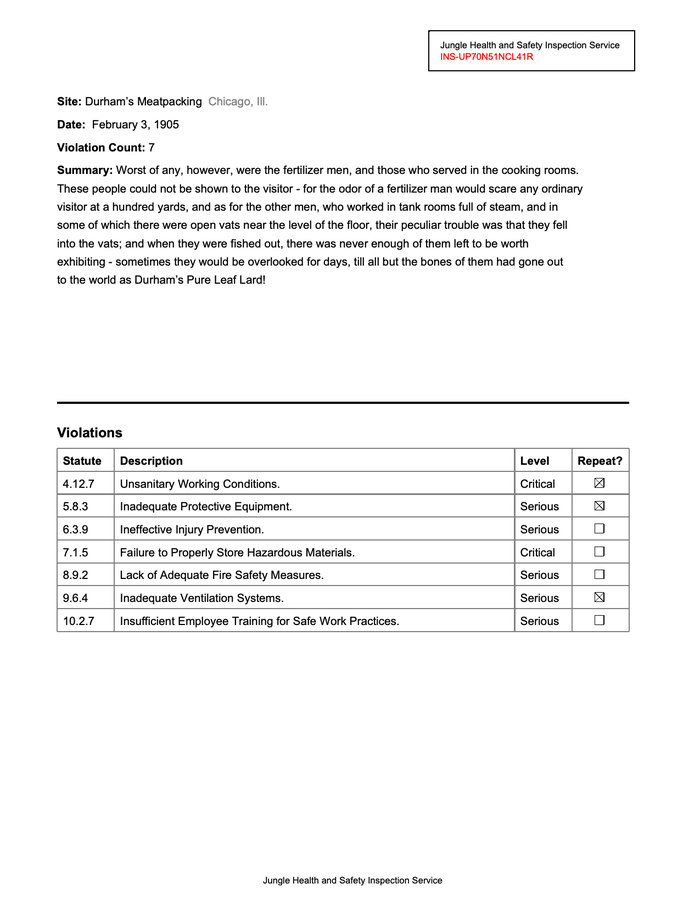

In [1]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

page.to_image(width=700)

## Running Basic Layout Analysis

Use the `analyze_layout()` method. By default, it uses the YOLO model.

In [2]:
# Analyze the layout using the default engine (YOLO)
# This adds 'region' elements to the page
page.analyze_layout()

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpy3rdeikf/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 699.0ms


Speed: 5.5ms preprocess, 699.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 800)


<ElementCollection[Region](count=7)>

In [3]:
# Find all detected regions
regions = page.find_all('region')
len(regions) # Show how many regions were detected

7

In [4]:
first_region = regions[0]
f"First region: type='{first_region.type}', confidence={first_region.confidence:.2f}"

"First region: type='abandon', confidence=0.81"

## Visualizing Detected Layout

Use `highlight()` or `show()` on the detected regions.

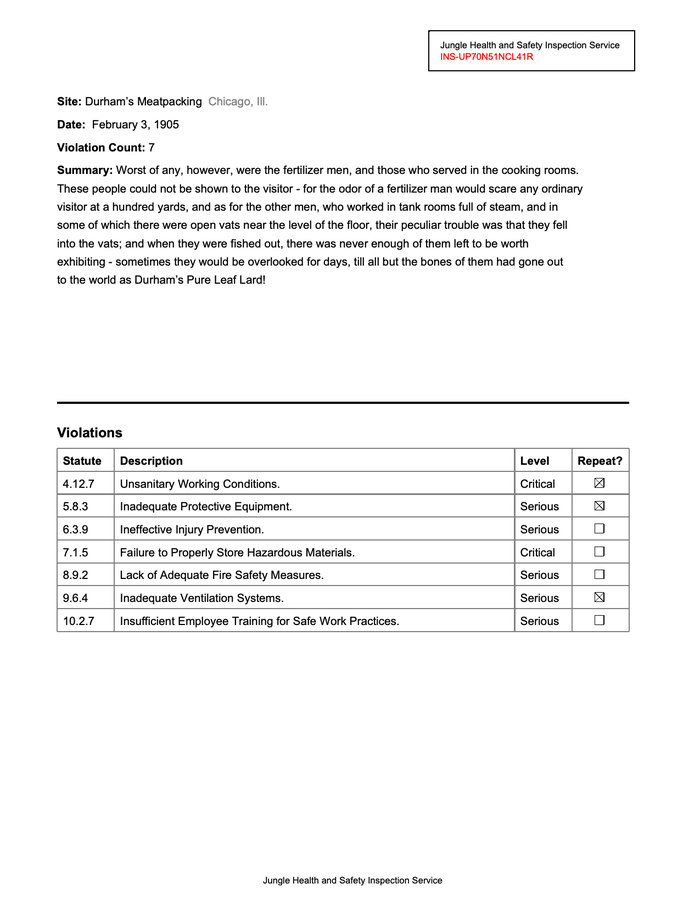

In [5]:
# Highlight all detected regions, colored by type
regions.highlight(group_by='type')
page.to_image(width=700)

## Finding Specific Region Types

Use attribute selectors to find regions of a specific type.

In [6]:
# Find all detected titles
titles = page.find_all('region[type=title]')
titles

<ElementCollection[Region](count=1)>

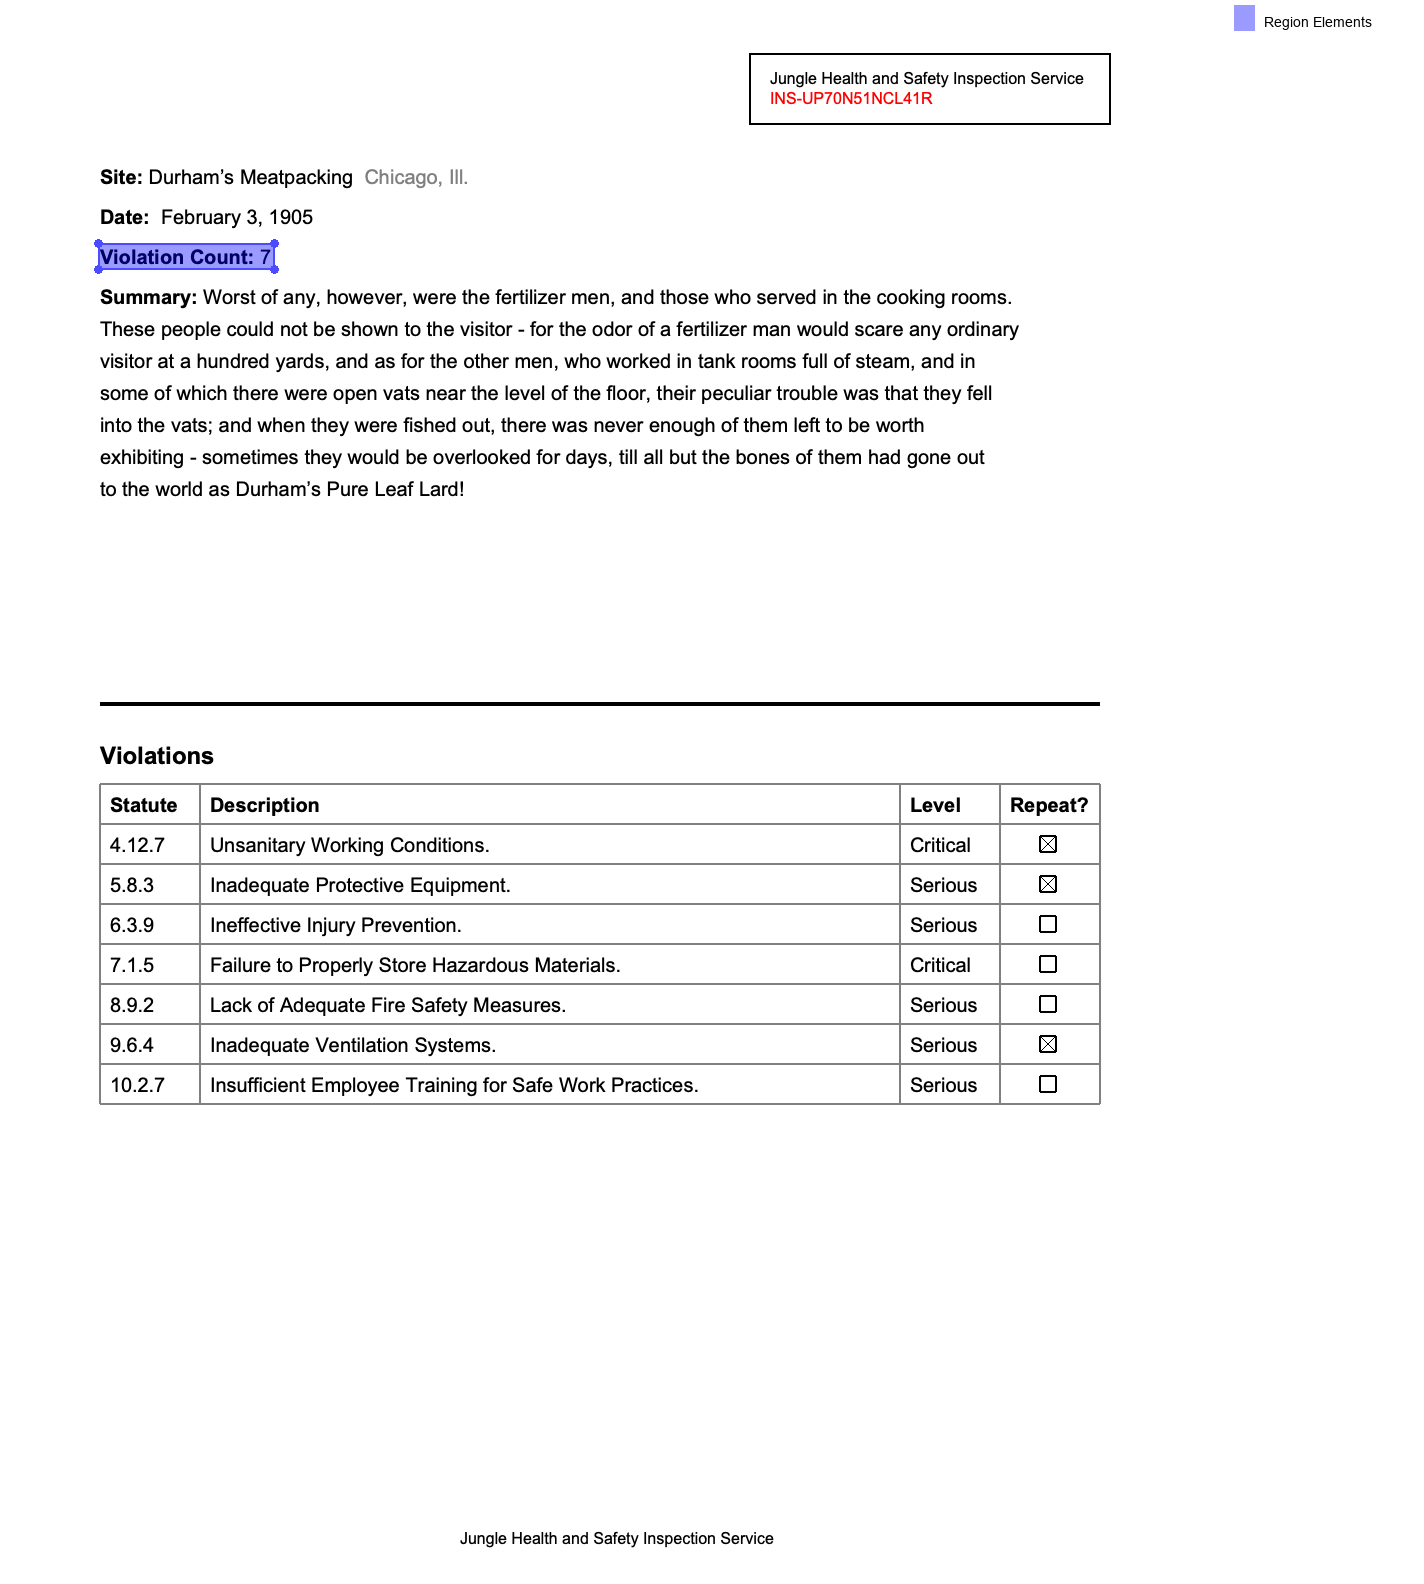

In [7]:
titles.show()

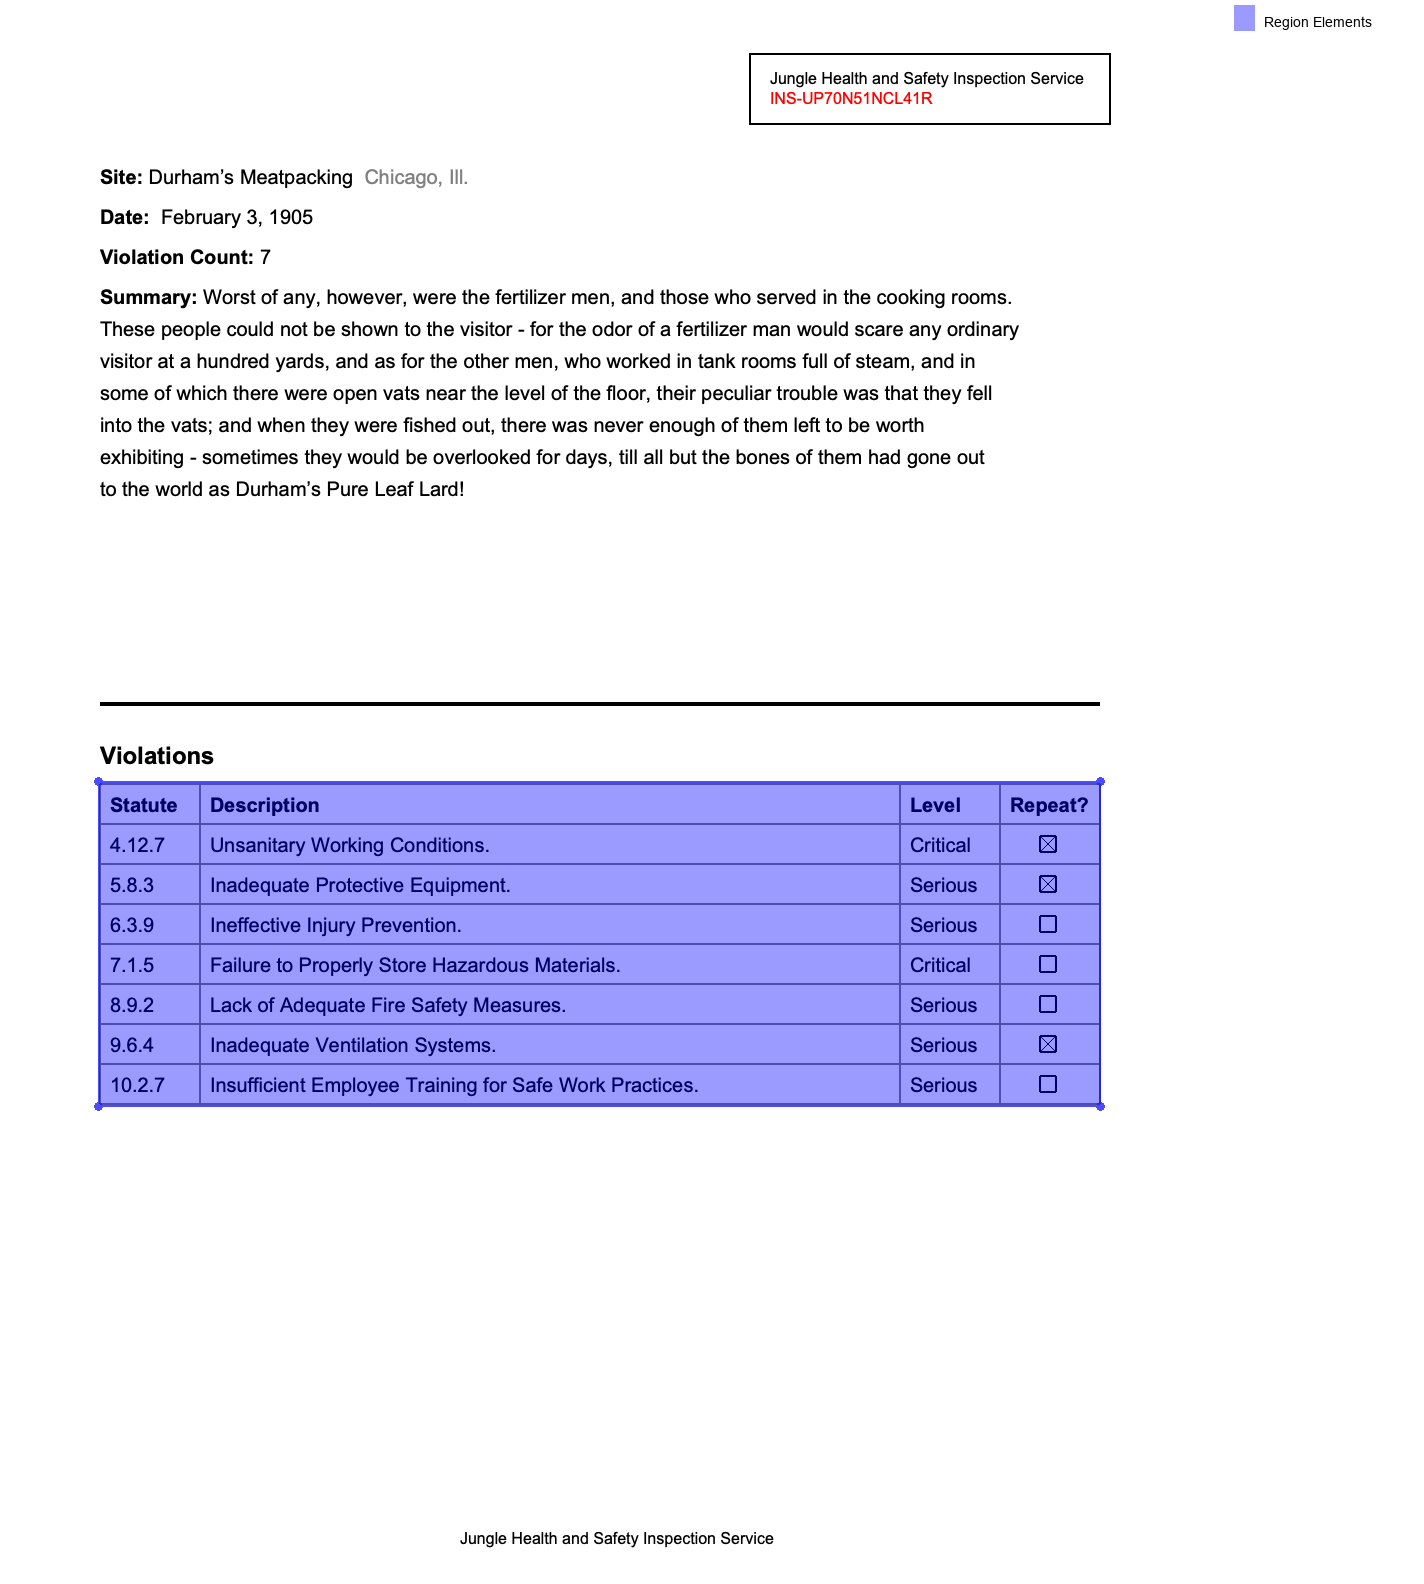

In [8]:
page.find_all('region[type=table]').show()

## Working with Layout Regions

Detected regions are like any other `Region` object. You can extract text, find elements within them, etc.

In [9]:
page.find('region[type=table]').extract_text(layout=True)

'Statute Description Level Repeat?\n4.12.7 Unsanitary Working Conditions. Critical\n5.8.3 Inadequate Protective Equipment. Serious\n6.3.9 Ineffective Injury Prevention. Serious\n7.1.5 Failure to Properly Store Hazardous Materials. Critical\n8.9.2 Lack of Adequate Fire Safety Measures. Serious\n9.6.4 Inadequate Ventilation Systems. Serious\n10.2.7 Insufficient Employee Training for Safe Work Practices. Serious'

## Using Different Layout Models

Natural PDF supports multiple engines (`yolo`, `paddle`, `tatr`). Specify the engine when calling `analyze_layout`.

*Note: Using different engines requires installing the corresponding extras (e.g., `natural-pdf[layout_paddle]`).* `yolo` is the default.

Creating model: ('PP-LCNet_x1_0_doc_ori', None)


Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


Creating model: ('UVDoc', None)


Using official model (UVDoc), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-DocBlockLayout', None)


Using official model (PP-DocBlockLayout), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-DocLayout_plus-L', None)


Using official model (PP-DocLayout_plus-L), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_textline_ori', None)


Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_table_cls', None)


Using official model (PP-LCNet_x1_0_table_cls), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('SLANeXt_wired', None)


Using official model (SLANeXt_wired), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('SLANet_plus', None)


Using official model (SLANet_plus), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('RT-DETR-L_wired_table_cell_det', None)


Using official model (RT-DETR-L_wired_table_cell_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('RT-DETR-L_wireless_table_cell_det', None)


Using official model (RT-DETR-L_wireless_table_cell_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-Chart2Table', None)


Using official model (PP-Chart2Table), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading configuration file /Users/soma/.paddlex/official_models/PP-Chart2Table/config.json


Loading weights file /Users/soma/.paddlex/official_models/PP-Chart2Table/model_state.pdparams


Loaded weights file from disk, setting weights to model.


All model checkpoint weights were used when initializing PPChart2TableInference.



All the weights of PPChart2TableInference were initialized from the model checkpoint at /Users/soma/.paddlex/official_models/PP-Chart2Table.
If your task is similar to the task the model of the checkpoint was trained on, you can already use PPChart2TableInference for predictions without further training.


Loading configuration file /Users/soma/.paddlex/official_models/PP-Chart2Table/generation_config.json


Creating model: ('PP-LCNet_x1_0_doc_ori', None)


Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_textline_ori', None)


Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


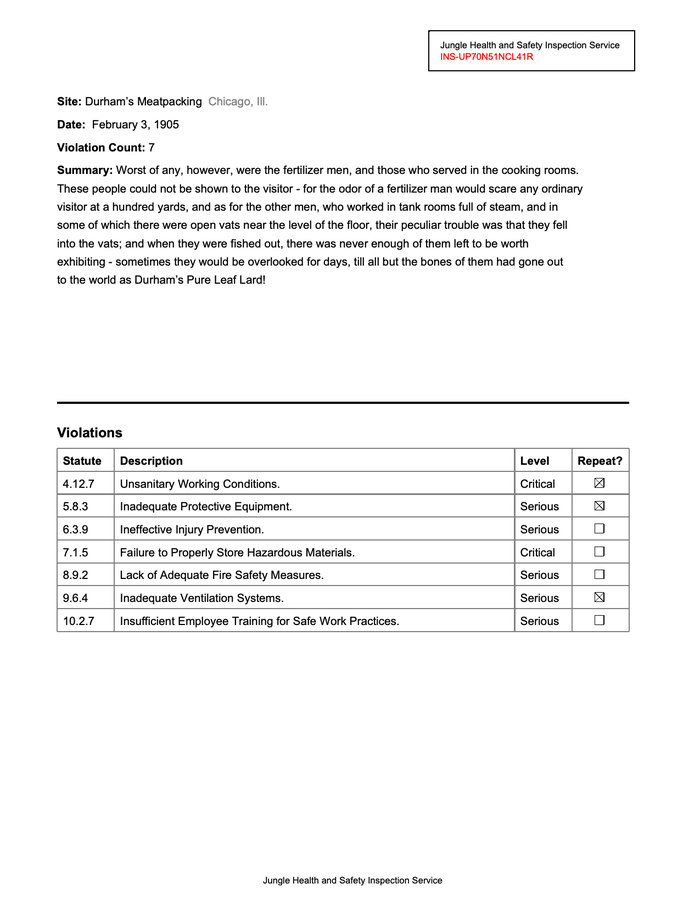

In [10]:
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="paddle")
page.find_all('region[model=paddle]').highlight(group_by='region_type')
page.to_image(width=700)

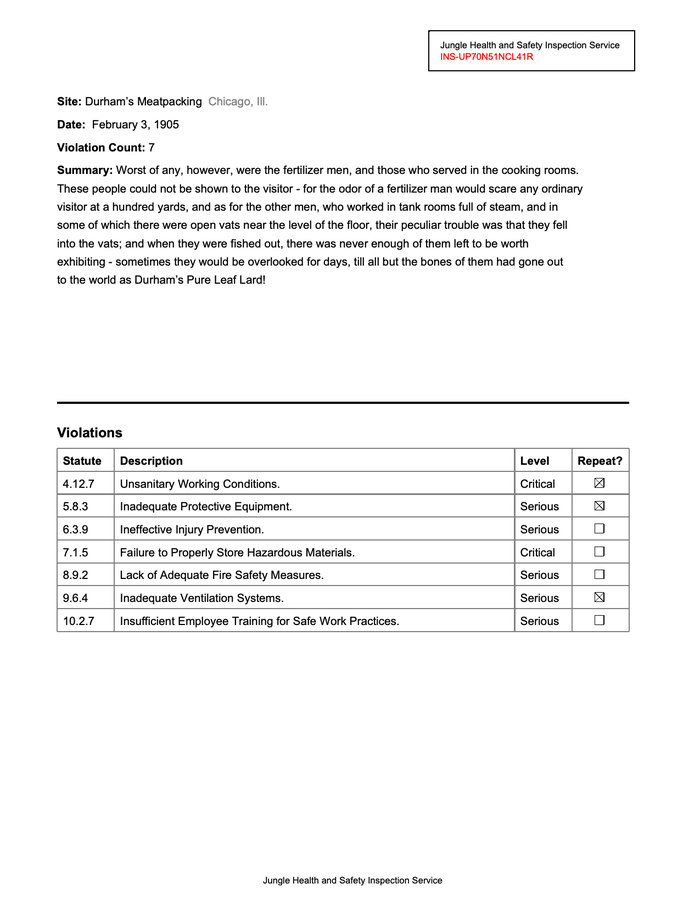

In [11]:
# Analyze using Table Transformer (TATR) - specialized for tables
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="tatr")
page.find_all('region[model=tatr]').highlight(group_by='region_type')
page.to_image(width=700)

In [12]:
# Analyze using Docling
# https://docling-project.github.io/docling/

# Docling has been weird, it's not included at the moment

# page.clear_detected_layout_regions()
# page.clear_highlights()

# page.analyze_layout(engine="docling")
# page.find_all('region[model=docling]').highlight(group_by='region_type')
# page.to_image(width=700)

Recognizing layout:   0%|                                                 | 0/1 [00:00<?, ?it/s]

Recognizing layout: 100%|█████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]

Recognizing layout: 100%|█████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]

Recognizing tables:   0%|                                                 | 0/1 [00:00<?, ?it/s]

Recognizing tables: 100%|█████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]

Recognizing tables: 100%|█████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]

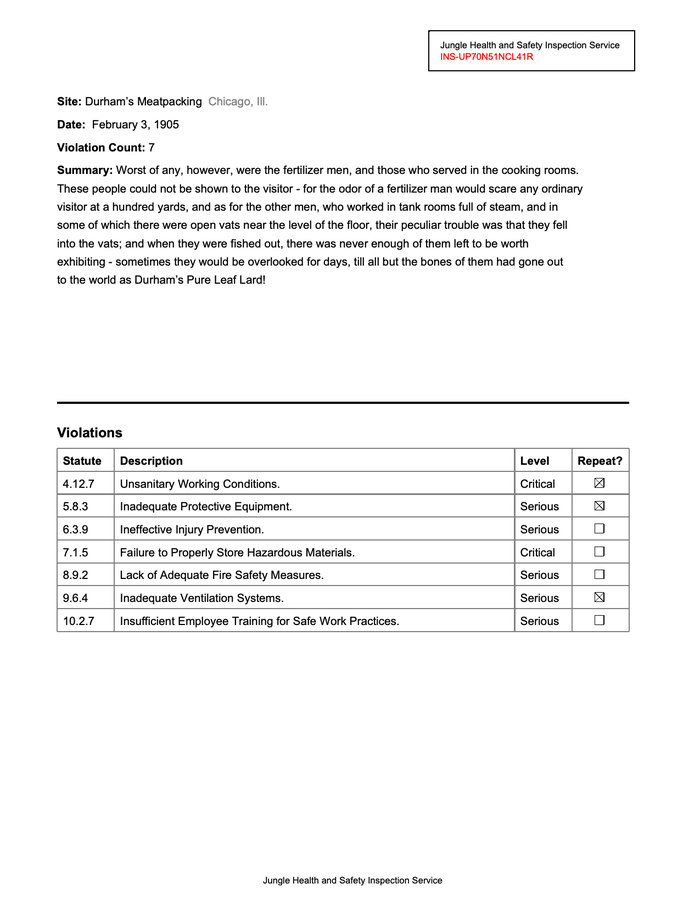

In [13]:
# Analyze using Table Transformer (TATR) - specialized for tables
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="surya")
page.find_all('region[model=surya]').highlight(group_by='region_type')
page.to_image(width=700)

*Note: Calling `analyze_layout` multiple times (even with the same engine) can add duplicate regions. You might want to use `page.clear_detected_layout_regions()` first, or filter by model using `region[model=yolo]`.* 

## Controlling Confidence Threshold

Filter detections by their confidence score.

In [14]:
# Re-run YOLO analysis (clearing previous results might be good practice)
page.clear_detected_layout_regions()
page.analyze_layout(engine="yolo")

# Find only high-confidence regions (e.g., >= 0.8)
high_conf_regions = page.find_all('region[confidence>=0.8]')
len(high_conf_regions)

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpetjodemb/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 780.2ms


Speed: 4.5ms preprocess, 780.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 800)


5

## Table Structure with TATR

The TATR engine provides detailed table structure elements (`table`, `table-row`, `table-column`, `table-column-header`). This is very useful for precise table extraction.

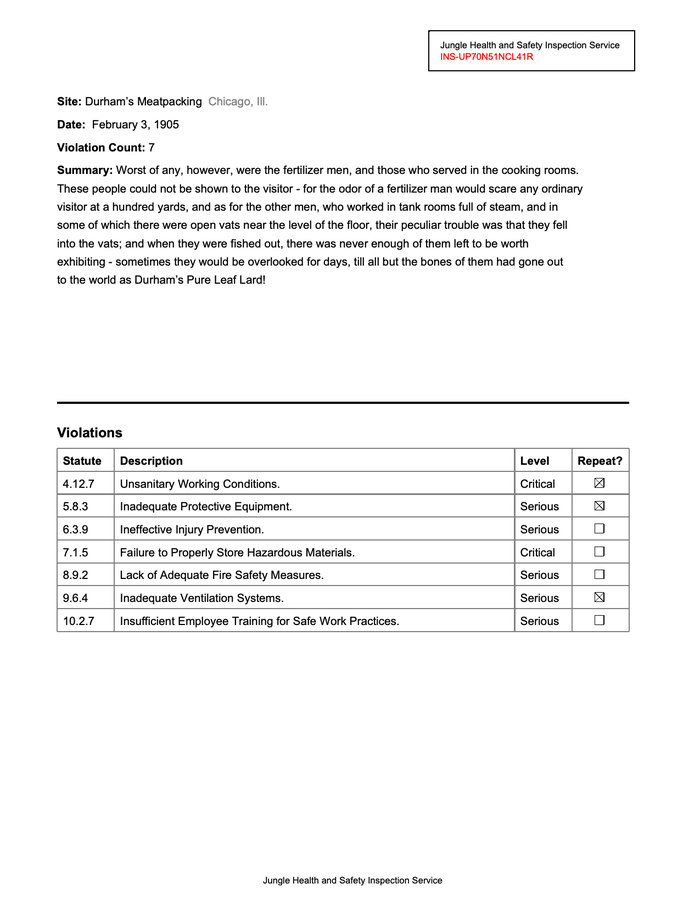

In [15]:
# Ensure TATR analysis has been run
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="tatr")
page.find_all('region[model=tatr]').highlight(group_by='region_type')
page.to_image(width=700)

In [16]:
# Find different structural elements from TATR
tables = page.find_all('region[type=table][model=tatr]')
rows = page.find_all('region[type=table-row][model=tatr]')
cols = page.find_all('region[type=table-column][model=tatr]')
hdrs = page.find_all('region[type=table-column-header][model=tatr]')

f"Found: {len(tables)} tables, {len(rows)} rows, {len(cols)} columns, {len(hdrs)} headers (from TATR)"

'Found: 2 tables, 8 rows, 4 columns, 1 headers (from TATR)'

### Enhanced Table Extraction with TATR

When a `region[type=table]` comes from the TATR model, `extract_table()` can use the underlying row/column structure for more robust extraction.

In [17]:
# Find the TATR table region again
tatr_table = page.find('region[type=table][model=tatr]')

# This extraction uses the detected rows/columns
tatr_table.extract_table()

[['Statute Description Level Repeat?'],
 ['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

if you'd like the normal approach instead of the "intelligent" one, you can ask for pdfplumber.

In [18]:
# This extraction uses the detected rows/columns
tatr_table.extract_table(method='pdfplumber')

[['Unsanitary Working Conditions.', 'Critical'],
 ['Inadequate Protective Equipment.', 'Serious'],
 ['Ineffective Injury Prevention.', 'Serious'],
 ['Failure to Properly Store Hazardous Materials.', 'Critical'],
 ['Lack of Adequate Fire Safety Measures.', 'Serious'],
 ['Inadequate Ventilation Systems.', 'Serious']]

## Using Gemini for Layout Analysis (Advanced)

Natural PDF supports layout analysis using Google's Gemini models via an OpenAI-compatible API. This is an advanced feature and requires you to provide your own OpenAI client, API key, and endpoint.

**Example usage:**

```py
from openai import OpenAI
from natural_pdf import PDF
from natural_pdf.analyzers.layout.layout_options import GeminiLayoutOptions

# Create a compatible OpenAI client for Gemini
client = OpenAI(
    api_key="YOUR_GOOGLE_API_KEY",
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

options = GeminiLayoutOptions(
    model_name="gemini-2.0-flash",
    client=client,
    classes=["text", "title"]
)

pdf = PDF("your.pdf")
page = pdf.pages[0]
regions = page.analyze_layout(engine="gemini", options=options)
```

- You must provide your own API key and endpoint for Gemini.
- The client must be compatible with the OpenAI API (see the `openai` Python package).
- This feature is intended for advanced users who need LLM-based layout analysis.

## Next Steps

Layout analysis provides regions that you can use for:

- [Table Extraction](../tables/index.ipynb): Especially powerful with TATR regions.
- [Text Extraction](../text-extraction/index.ipynb): Extract text only from specific region types (e.g., paragraphs).
- [Document QA](../document-qa/index.ipynb): Focus question answering on specific detected regions.